In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [4]:
print(result.diagnose())

Processing csv files: /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205416_1.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205416_2.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205416_3.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205416_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
415 of 4000 (10.38%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  sigma
Such high values indicate inc

In [5]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

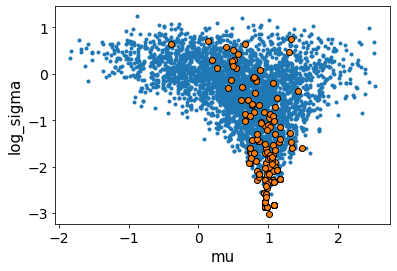

In [6]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

Variant B

In [7]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [9]:
print(result.diagnose())

Processing csv files: /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205418_1.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205418_2.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205418_3.csv, /var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmpy70wthd0/stan1-20220319205418_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [10]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

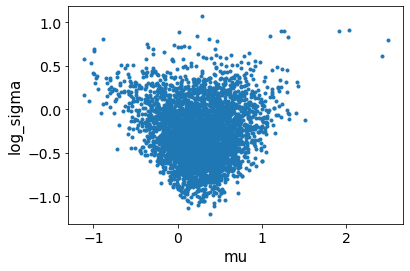

In [11]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

In [12]:
# in second one we have more params and not specified geometry of the space 
# where we are looking for data
# In first one we have geometry nad less params which makes more parameters
# divergent, which is visualized by orange dots